In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()

# Disabling warnings
import warnings
warnings.simplefilter("ignore")

# ML 
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [100]:
hd = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df = hd.copy()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Exploring the data

In [101]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [102]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

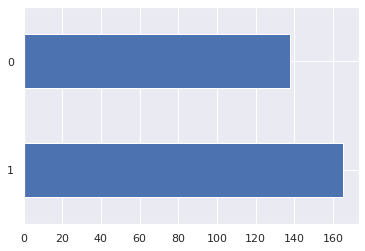

In [103]:
df.target.value_counts().plot.barh();

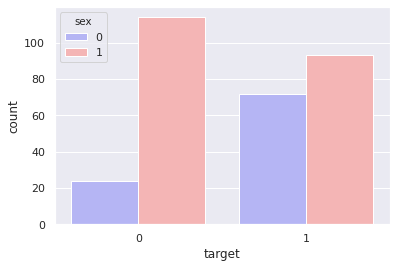

In [104]:
sns.countplot(x="target",hue = "sex", data=df, palette="bwr");

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [106]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [107]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [108]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [109]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [110]:
# Normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

### Now we will try to predict patients with given specifities has the heart attack or not.

## 1) Logistic Regression

In [112]:
lr = LogisticRegression(solver = 'liblinear')
lr_model = lr.fit(x_train,y_train)
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_pred = lr_model.predict(x_test)

In [114]:
confusion_matrix(y_test,y_pred)

array([[27,  2],
       [ 6, 26]])

In [115]:
accuracy_score(y_test,y_pred)

0.8688524590163934

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [117]:
lr_model.predict(x_test)[-10:]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [118]:
lr_model.predict_proba(x_test)[-10:]

array([[0.9815735 , 0.0184265 ],
       [0.41188732, 0.58811268],
       [0.03303041, 0.96696959],
       [0.78248526, 0.21751474],
       [0.96427658, 0.03572342],
       [0.88835508, 0.11164492],
       [0.05558712, 0.94441288],
       [0.94635468, 0.05364532],
       [0.98473198, 0.01526802],
       [0.91134308, 0.08865692]])

### Tuning

In [119]:
y_probs = lr_model.predict_proba(x_test)[:,1]

In [120]:
y_pred = [1 if i>0.52 else 0 for i in y_probs]
y_pred[-10:]

[0, 1, 1, 0, 0, 0, 1, 0, 0, 0]

In [121]:
confusion_matrix(y_test,y_pred)

array([[28,  1],
       [ 6, 26]])

In [122]:
accuracy_score(y_test,y_pred)

0.8852459016393442

### ROC Curve

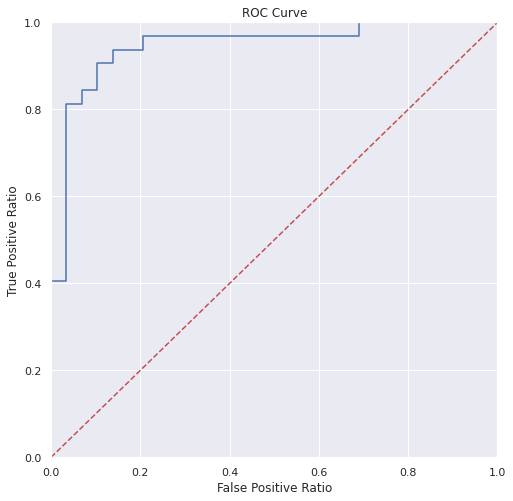

In [123]:
logit_roc_auc = roc_auc_score(y_test,lr_model.predict(x_test))

fpr, tpr, tresholds = roc_curve(y_test,lr_model.predict_proba(x_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');

In [124]:
print('Accuracy Rate:',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr_model.score(x_train, y_train)))
print("Logistic TEST score with ",format(lr_model.score(x_test, y_test)))
cm=confusion_matrix(y_test,y_pred)
print(cm)

Accuracy Rate: 0.8852459016393442
Logistic TRAIN score with  0.8512396694214877
Logistic TEST score with  0.8688524590163934
[[28  1]
 [ 6 26]]


## 2) Naive Bayes

In [125]:
y = df.target
x = df.drop('target',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.20,
                                                random_state = 42)

In [126]:
nb = GaussianNB()
nb_model = nb.fit(x_train,y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
y_pred = nb_model.predict(x_test)
y_pred[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [128]:
accuracy_score(y_test,y_pred)

0.7704918032786885

In [129]:
y_probs = nb_model.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.4 else 0 for i in y_probs]
y_pred[-10:]

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0]

In [130]:
accuracy_score(y_test,y_pred)

0.7868852459016393

## 3) KNN 

In [132]:
y = df.target
x = df.drop('target',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.20,
                                                random_state = 42)

In [133]:
knn =KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [134]:
y_pred = knn_model.predict(x_test)

In [135]:
accuracy_score(y_test,y_pred)

0.6885245901639344

### Tuning

In [136]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [137]:
knn =KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv = 10)
knn_cv = knn_cv.fit(x_train,y_train)

In [138]:
print("Best Score:"+str(knn_cv.best_score_))
print("Best Parameters:"+str(knn_cv.best_params_))

Best Score:0.6736666666666666
Best Parameters:{'n_neighbors': 21}


In [139]:
knn_final =KNeighborsClassifier(n_neighbors = 21)
knn_final = knn_final.fit(x_train,y_train)
y_pred = knn_final.predict(x_test)
accuracy_score(y_test,y_pred)

0.7049180327868853

## 4) SVM (Support Vector Machines)

In [140]:
y = df.target
x = df.drop('target',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.20,
                                                random_state = 42)

In [150]:
svm_model = SVC(kernel='linear').fit(x_train,y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
y_pred = svm_model.predict(x_test)

In [152]:
accuracy_score(y_test,y_pred)

0.8524590163934426

### Model Tuning

In [153]:
svc_params = {"C":np.arange(1,50)}
svc = SVC(kernel = 'linear')
svc_cv_model = GridSearchCV(svc,svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(x_train,y_train)


Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed: 23.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [158]:
print("Best Parameters:"+str(svc_cv_model.best_params_))
accuracy_score(y_test,y_pred)

Best Parameters:{'C': 2}


0.8524590163934426

In [155]:
svc_tuned = SVC(kernel = "linear",C=2).fit(x_train,y_train)
y_pred = svc_tuned.predict(x_test)

In [156]:
accuracy_score(y_test,y_pred)

0.8524590163934426

## 5) SVM-RBF

In [159]:
svc_model = SVC(kernel = "rbf").fit(x_train,y_train)
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [160]:
y_pred = svc_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7049180327868853

### Tuning

In [161]:
svc_params ={"C":[0.00001,0.001,0.01,5,10,50,100],
            "gamma":[0.0001,0.001,0.01,1,5,10,50,100]}

In [162]:
svc =SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
svc_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    3.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.001, 0.01, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [163]:
print("Best Parameters:"+str(svc_cv_model.best_params_))

Best Parameters:{'C': 100, 'gamma': 0.0001}


In [164]:
svc_tuned = SVC(C=100,gamma = 0.0001).fit(x_train,y_train)


In [165]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.819672131147541